<a href="https://colab.research.google.com/github/Sailakshmi008/Project1/blob/main/Timeseries24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

enter q value: 10
Trend: [  0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.    133.7   135.225 135.15  134.975   0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.   ]
Seasonality: [-64.86840278 -55.63090278 -50.09340278 -46.00590278  24.98159722
  28.98159722  30.48159722  42.48159722  46.98159722  38.48159722
 -25.91840278 -28.09340278 -30.73506944 -19.34340278  24.98159722
  28.98159722  30.48159722  42.48159722  46.98159722  38.48159722
 -25.91840278 -28.09340278 -30.73506944 -19.34340278]


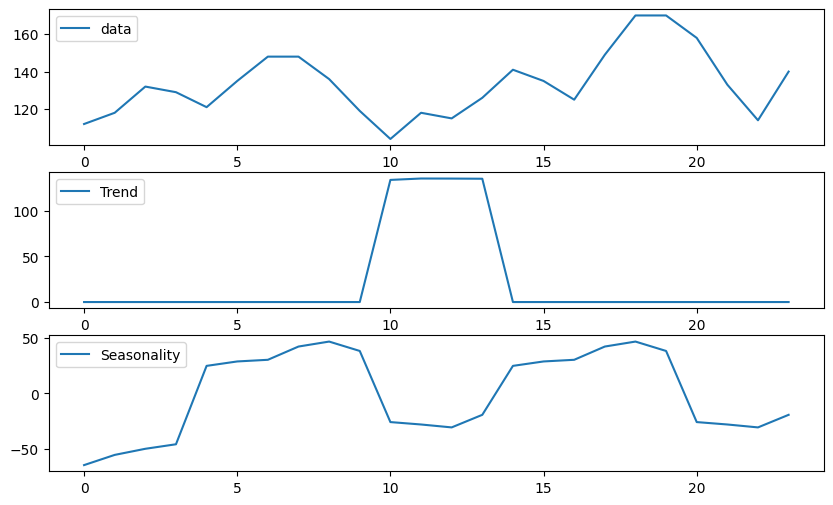

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def moving_average_odd(data, q):
    """
    Moving average for odd number of data points.
    """
    n = len(data)
    m_t = np.zeros(n)

    for t in range(q, n - q):
        m_t[t] = np.mean(data[t-q:t+q+1])

    return m_t

def moving_average_even(data, q):
    """
    Moving average for even number of data points.
    """
    n = len(data)
    m_t = np.zeros(n)
    d = 2*q

    for t in range(q, n - q):
        m_t[t] = (0.5 * data[t-q] + np.sum(data[t-q+1:t+q]) + 0.5 * data[t+q]) / d

    return m_t

def calculate_w_k(data, trend, d):
    """
    Calculate w_k (seasonality and irregularity).
    """
    n = len(data)
    w_k = np.zeros(n)

    for k in range(n):
        summation = 0
        count = 0
        for j in range(-(n // d), n // d):
            if 0 <= k + j*d < n:
                summation += data[k + j*d] - trend[k + j*d]
                count += 1
        if count > 0:
            w_k[k] = summation / count

    return w_k

def calculate_g_k(w_k, d):
    """
    Calculate g_k (seasonality).
    """
    n = len(w_k)
    avg_w = np.mean(w_k)
    g_k = np.zeros(n)

    for k in range(n):
        g_k[k] = w_k[k] - avg_w

    return g_k

# Example usage
data = np.array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140])  # Replace with your time series data
q = int(input("enter q value: "))# Replace with your specific value of q

if len(data) % 2 == 1:
    trend = moving_average_odd(data, q)
else:
    trend = moving_average_even(data, q)

w_k = calculate_w_k(data, trend, q)
g_k = calculate_g_k(w_k, q)

print("Trend:", trend)
print("Seasonality:", g_k)

plt.figure(figsize=(10, 6))

plt.subplot(311)
plt.plot(data,label="data")
plt.legend(loc='upper left')
plt.subplot(312)
plt.plot(trend,label='Trend')
plt.legend(loc='upper left')
plt.subplot(313)
plt.plot(g_k,label="Seasonality")
plt.legend(loc='upper left')
plt.show()